In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import re

# Rank Swapping

In [2]:
numeric_cols = ['bin', 'amount']
all_cols = ['txid', 'bookingdate', 'issuercountrycode', 'txvariantcode', 'bin',
       'amount', 'currencycode', 'shoppercountrycode', 'shopperinteraction',
       'simple_journal', 'cardverificationcodesupplied', 'cvcresponsecode',
       'creationdate', 'accountcode', 'mail_id', 'ip_id', 'card_id']

In [3]:
from rank_swapping import rank_swapping
from models import models
from sklearn.model_selection import train_test_split
from preprocessing import preprocess



results = []

for p in [0, 1, 2, 5]:
    data = "./data/data_for_student_case.csv"
    df1 = pd.read_csv(data)

    #rankswap
    swap_cols = all_cols
    df1 = rank_swapping(df1, p, swap_cols)

    #preprocess
    df1 = preprocess(df1)

    x_columns = ['txid', 'issuercountrycode', 'txvariantcode', 'bin', 'amount', 'currencycode', 'shoppercountrycode', 'shopperinteraction', 'simple_journal', 'cardverificationcodesupplied', 'cvcresponsecode', 'mail_id', 'ip_id', 'card_id', 'amount_eur', 'accountcode_cc', 'countries_equal', 'day_of_week', 'hour']
    X = df1[x_columns].to_numpy(dtype=np.float)
    Y = df1['simple_journal'].to_numpy(dtype=np.int)

    print(np.argwhere(np.isnan(X)))
    nans = ~np.isnan(X).any(axis=1)
    X = X[nans] # remove NaN
    Y = Y[nans] # remove NaN
    print( np.shape(X))

    #build and evaluate model
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)
    result = models.DecisionTree(X_train, X_test, Y_train, Y_test)
    # save metrics to play with latter :)
    result['p'] = p
    results.append(result) 


RankSwapping with p = 0
Not Swapping :)
[]
(237036, 19)
Building Decision Tree
Done
RankSwapping with p = 1
swapped 5%
swapped 11%
swapped 17%
swapped 23%
swapped 29%
swapped 35%
swapped 41%
swapped 47%
swapped 52%
swapped 58%
swapped 64%
swapped 70%
swapped 76%
swapped 82%
swapped 88%
swapped 94%
swapped 100%
[]
(237036, 19)
Building Decision Tree
Done
RankSwapping with p = 2
swapped 5%
swapped 11%
swapped 17%
swapped 23%
swapped 29%
swapped 35%
swapped 41%
swapped 47%
swapped 52%
swapped 58%
swapped 64%
swapped 70%
swapped 76%
swapped 82%
swapped 88%
swapped 94%
swapped 100%
[[218520      3]]
(237035, 19)
Building Decision Tree
Done
RankSwapping with p = 5
swapped 5%
swapped 11%
swapped 17%
swapped 23%
swapped 29%
swapped 35%
swapped 41%
swapped 47%
swapped 52%
swapped 58%
swapped 64%
swapped 70%
swapped 76%
swapped 82%
swapped 88%
swapped 94%
swapped 100%
[[218518      3]]
(237035, 19)
Building Decision Tree
Done


### Plots

No handles with labels found to put in legend.
p  accuracy  precision  recall  F1 
------------------------------------------
0	1.0	1.0	1.0	1.0
1	1.0	1.0	1.0	1.0
2	1.0	1.0	1.0	1.0
5	1.0	1.0	1.0	1.0


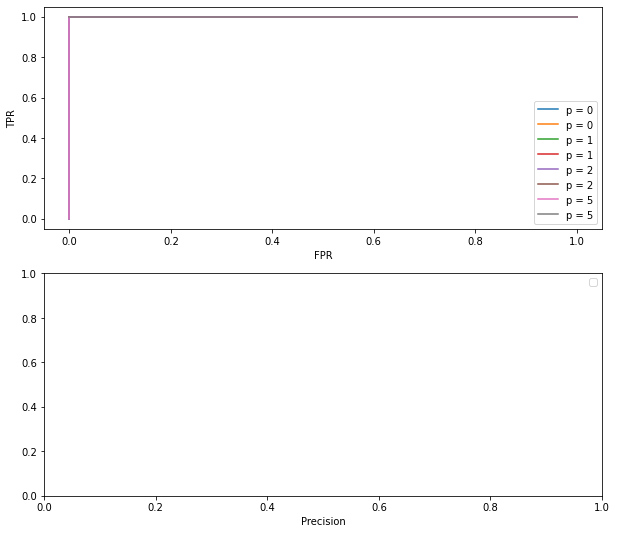

In [7]:
fig, (tpr_fpr_plot, p_r_plot) = plt.subplots(2)
fig.set_size_inches(10,9)

tpr_fpr_plot.set_xlabel("FPR")
tpr_fpr_plot.set_ylabel("TPR")

p_r_plot.set_xlabel("Recall")
p_r_plot.set_xlabel("Precision")

print("p  accuracy  precision  recall  F1 ")
print('------------------------------------------')
for result in results:
    print(str(result['p']) + "\t"+ str(result['accuracy']) + "\t" +str(result['precision']) + "\t" +str(result['recall']) + "\t" +str(result['f1']))

    tpr_fpr_plot.plot(result['false_pos_rate'], result['true_pos_rate'], label="p = "+str(result['p']))
    tpr_fpr_plot.plot(result['recall_curve'], result['precision_curve'], label="p = "+str(result['p']))

tpr_fpr_plot.legend()
p_r_plot.legend()
plt.show()